In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install pycountry

import nltk
nltk.download('vader_lexicon')
import nltk
nltk.download('stopwords')

/bin/bash: -c: line 0: syntax error near unexpected token `'vader_lexicon''
/bin/bash: -c: line 0: `nltk.download('vader_lexicon')'
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Tweepy es una biblioteca de Python para acceder a la API de Twitter. Es ideal para la automatización simple y la creación de bots de Twitter. Tweepy tiene muchas características.



Funcion para:
Obtener  tweets .
Creación y eliminación de tweets.
Siga y deje de seguir a los usuarios.

In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import nltk 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer



Antes de la autenticación, debe tener una cuenta de desarrollador de Twitter.

OAuth 2 es un método de autenticación en el que una aplicación realiza solicitudes de API sin el contexto del usuario. Utilice este método si solo necesita acceso de solo lectura a información pública.


Primero registra nuestra aplicación de cliente y adquiere una clave de consumidor y una *secreta*. Luego, crea una instancia de AppAuthHandler, pasando nuestra clave y secreto de consumidor.

In [ ]:
# Authentication
consumerKey = "y4WOc1uHJzXMnasBXUKKKDw17"
consumerSecret = "FBzS87ZJigDWZltBKkBHVVWm2qyQhrK3qff31ch5Tce7uEUJhB"
accessToken = "1025201257-w0h3Jiis1R7Z6CuDi5mU1cWnU5sKPxF1JDLPjDl"
accessTokenSecret = "ZHXiKMdBQjwH1ibeYmGjH6dtpDrOTpo3HPk9yomf2ThjG"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:

#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search:")
noOfTweet = int(input ("Please enter how many tweets to analyze:"))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:Cristiano Ronaldo
Please enter how many tweets to analyze:2500


**Cantidad de tweets incluyen sentimiento positivo**


**Cantidad de tweets incluyen sentimiento negativo**


**Cantidad de tweets incluyen  sentimiento neutral**

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  577
negative number:  544
neutral number:  1379


In [ ]:
tweet_list

,0
0,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...
1,RT @EverythingCR7_: Cristiano Ronaldo has stil...
2,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...
3,RT @Cristia82137311: Most goals in the Serie A...
4,"@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob..."
...,...
2495,RT @ArobaseGiovanny: 🔴 Blessures au Real Madri...
2496,"RT @KIoppage: ""and Cristiano Ronaldo steps up ..."
2497,RT @mufcMPB: A return to the Champions League ...
2498,"RT @ChampionsLeague: 🗣️ ""Every time I step ont..."


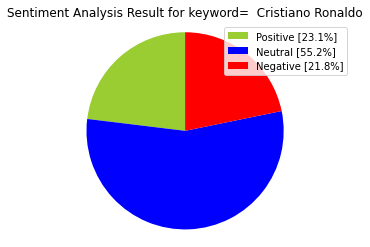

In [ ]:

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

### **Limpieza de tweets para analizar el sentimiento**

 Puede haber algunos tweets duplicados, por lo que debe **eliminar los registros duplicados** utilizando la función drop_duplicates .

In [ ]:

tweet_list.drop_duplicates(inplace = True)

Despues de eliminar duolicados quedan 

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...
1,RT @EverythingCR7_: Cristiano Ronaldo has stil...,RT @EverythingCR7_: Cristiano Ronaldo has stil...
3,RT @Cristia82137311: Most goals in the Serie A...,RT @Cristia82137311: Most goals in the Serie A...
4,"@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob...","@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob..."
5,Cristiano Ronaldo y su ataque de rabia: tira l...,Cristiano Ronaldo y su ataque de rabia: tira l...
...,...,...
2480,@Cristiano I just realized everyone loves Rona...,@Cristiano I just realized everyone loves Rona...
2482,Jogadores que marcaram mais gols sem pênaltis ...,Jogadores que marcaram mais gols sem pênaltis ...
2492,@Piero_Sanchez14 Cr7 está al nivel del bicho y...,@Piero_Sanchez14 Cr7 está al nivel del bicho y...
2494,La clasificación a Champions League le permite...,La clasificación a Champions League le permite...


In [ ]:
tweet_list

,0,text
0,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...
1,RT @EverythingCR7_: Cristiano Ronaldo has stil...,RT @EverythingCR7_: Cristiano Ronaldo has stil...
3,RT @Cristia82137311: Most goals in the Serie A...,RT @Cristia82137311: Most goals in the Serie A...
4,"@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob...","@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob..."
5,Cristiano Ronaldo y su ataque de rabia: tira l...,Cristiano Ronaldo y su ataque de rabia: tira l...
...,...,...
2480,@Cristiano I just realized everyone loves Rona...,@Cristiano I just realized everyone loves Rona...
2482,Jogadores que marcaram mais gols sem pênaltis ...,Jogadores que marcaram mais gols sem pênaltis ...
2492,@Piero_Sanchez14 Cr7 está al nivel del bicho y...,@Piero_Sanchez14 Cr7 está al nivel del bicho y...
2494,La clasificación a Champions League le permite...,La clasificación a Champions League le permite...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...,cristiano ronaldo in the ucl on this day 20...
1,RT @EverythingCR7_: Cristiano Ronaldo has stil...,cristiano ronaldo has still 37 goal contribut...
3,RT @Cristia82137311: Most goals in the Serie A...,most goals in the serie a since the arrival o...
4,"@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob...",buffon pavar lugano pique roberto carlos...
5,Cristiano Ronaldo y su ataque de rabia: tira l...,cristiano ronaldo y su ataque de rabia tira l...
6,RT @TeamCRonaldo: Cristiano Ronaldo’s speech a...,cristiano ronaldo s speech after the 2018 ucl...
7,"RT @KIoppage: ""and Cristiano Ronaldo steps up ...",and cristiano ronaldo steps up to take the p...
8,RT @utdreport: Mason Greenwood is the first te...,mason greenwood is the first teenager to scor...
9,RT @BKalendarza: #BramkaZKalendarza - 12 kwiet...,bramkazkalendarza 12 kwietnia 2016 cristi...
11,"RT @CR7Brasil: Há 5 anos, Cristiano Ronaldo fa...",h 5 anos cristiano ronaldo fazia uma de sua...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...,cristiano ronaldo in the ucl on this day 20...,0.00,0.000000,negative,0.178,0.822,0.000,-0.4404
1,RT @EverythingCR7_: Cristiano Ronaldo has stil...,cristiano ronaldo has still 37 goal contribut...,0.10,0.200000,neutral,0.000,1.000,0.000,0.0000
3,RT @Cristia82137311: Most goals in the Serie A...,most goals in the serie a since the arrival o...,0.50,0.500000,neutral,0.000,1.000,0.000,0.0000
4,"@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob...",buffon pavar lugano pique roberto carlos...,0.00,0.000000,negative,0.149,0.851,0.000,-0.2732
5,Cristiano Ronaldo y su ataque de rabia: tira l...,cristiano ronaldo y su ataque de rabia tira l...,0.00,0.000000,negative,0.110,0.890,0.000,-0.2732
6,RT @TeamCRonaldo: Cristiano Ronaldo’s speech a...,cristiano ronaldo s speech after the 2018 ucl...,0.10,0.650000,positive,0.000,0.697,0.303,0.7269
7,"RT @KIoppage: ""and Cristiano Ronaldo steps up ...",and cristiano ronaldo steps up to take the p...,0.00,0.000000,negative,0.231,0.769,0.000,-0.4588
8,RT @utdreport: Mason Greenwood is the first te...,mason greenwood is the first teenager to scor...,0.25,0.333333,neutral,0.000,1.000,0.000,0.0000
9,RT @BKalendarza: #BramkaZKalendarza - 12 kwiet...,bramkazkalendarza 12 kwietnia 2016 cristi...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
11,"RT @CR7Brasil: Há 5 anos, Cristiano Ronaldo fa...",h 5 anos cristiano ronaldo fazia uma de sua...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,477,60.69
positive,215,27.35
negative,94,11.96


In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")


In [ ]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:

#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/MyDrive/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("/content/drive/MyDrive/wc.png")
    print("Word Cloud Saved Successfully")
    path="/content/drive/MyDrive/wc.png"
    display(Image.open(path))

In [ ]:
/content

Files in '/content': ['.config', 'sample_data']


Word Cloud Saved Successfully


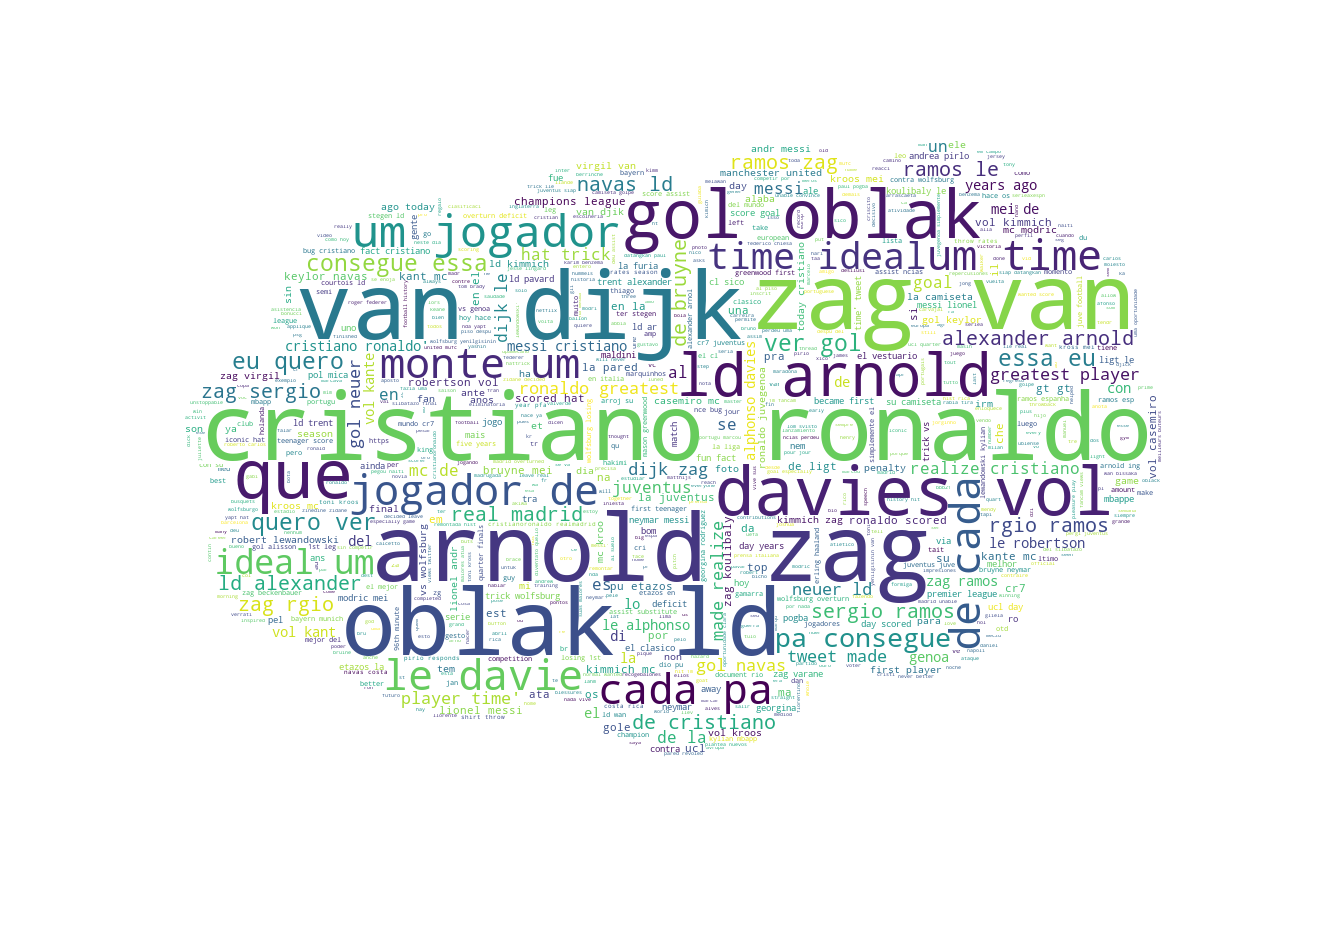

In [ ]:

#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


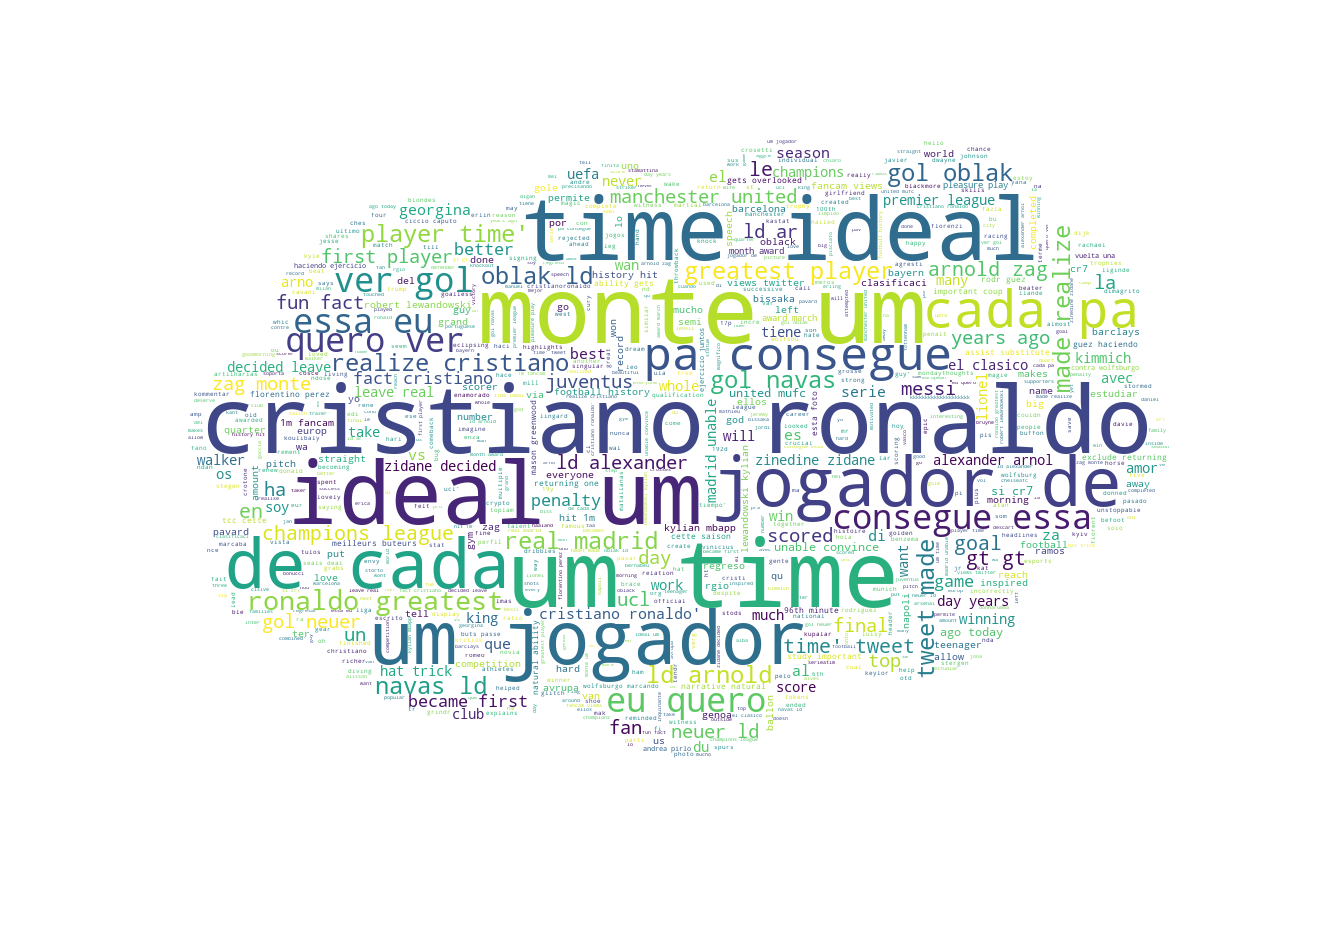

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


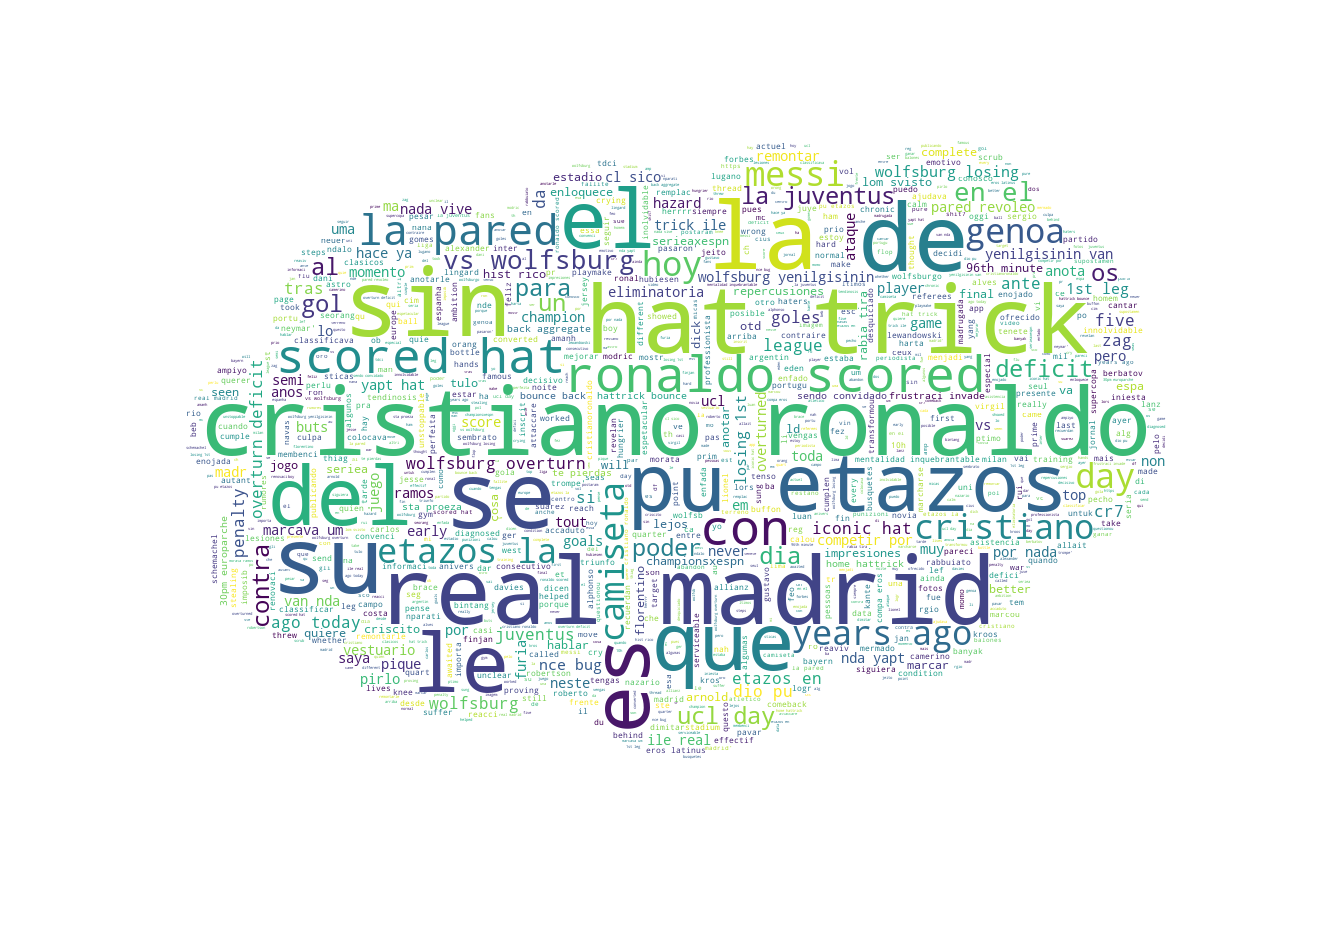

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


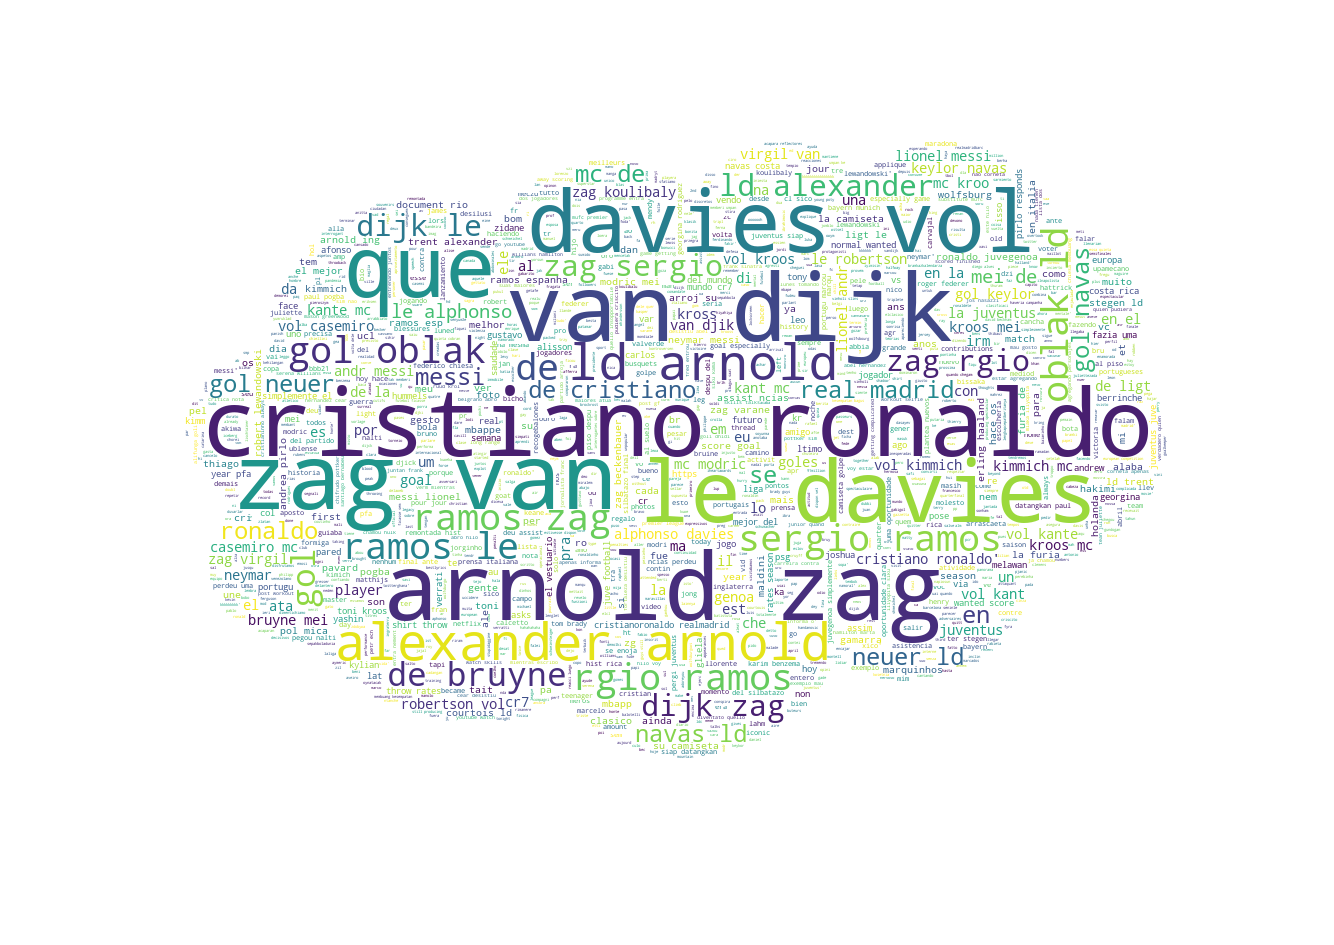

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,111.18
neutral,93.94
positive,102.87


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.94
neutral,15.16
positive,17.80


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @ESPNFC: Cristiano Ronaldo in the UCL on th...,cristiano ronaldo in the ucl on this day 20...,0.0,0.0,negative,0.178,0.822,0.0,-0.4404,129,24,cristiano ronaldo in the ucl on this day ...,"[, cristiano, ronaldo, in, the, ucl, on, this,...","[, cristiano, ronaldo, ucl, day, scored, hat, ...","[, cristiano, ronaldo, ucl, day, score, hat, t..."
1,RT @EverythingCR7_: Cristiano Ronaldo has stil...,cristiano ronaldo has still 37 goal contribut...,0.1,0.2,neutral,0.000,1.000,0.0,0.0000,106,17,cristiano ronaldo has still goal contributio...,"[, cristiano, ronaldo, has, still, goal, contr...","[, cristiano, ronaldo, still, goal, contributi...","[, cristiano, ronaldo, still, goal, contribut,..."
3,RT @Cristia82137311: Most goals in the Serie A...,most goals in the serie a since the arrival o...,0.5,0.5,neutral,0.000,1.000,0.0,0.0000,119,19,most goals in the serie a since the arrival o...,"[, most, goals, in, the, serie, a, since, the,...","[, goals, serie, since, arrival, cristiano, ro...","[, goal, seri, sinc, arriv, cristiano, ronaldo..."
4,"@TNTSportsBR Buffon, Pavar, Lugano, Pique, Rob...",buffon pavar lugano pique roberto carlos...,0.0,0.0,negative,0.149,0.851,0.0,-0.2732,107,14,buffon pavar lugano pique roberto carlos...,"[, buffon, pavar, lugano, pique, roberto, carl...","[, buffon, pavar, lugano, pique, roberto, carl...","[, buffon, pavar, lugano, piqu, roberto, carlo..."
5,Cristiano Ronaldo y su ataque de rabia: tira l...,cristiano ronaldo y su ataque de rabia tira l...,0.0,0.0,negative,0.110,0.890,0.0,-0.2732,110,19,cristiano ronaldo y su ataque de rabia tira l...,"[cristiano, ronaldo, y, su, ataque, de, rabia,...","[cristiano, ronaldo, su, ataque, de, rabia, ti...","[cristiano, ronaldo, su, ataqu, de, rabia, tir..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

786 Number of reviews has 2229 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aanvoerd,ab,abajo,abando,abandon,abbia,abdominal,abel,aben,abil,abou,abril,abro,absurda,aca,acaba,acapara,acaparan,accaduto,acha,acham,achar,acho,actitud,activit,actuel,adorey,adversair,afferra,afonso,aft,aggr,aggreg,ago,agr,agregando,agresti,ahead,ahora,...,wolfsbourg,wolfsbu,wolfsburg,wolfsburgo,wolfsburgowi,wont,work,workout,world,would,wrong,x,xavi,xico,xke,ya,yana,yang,yapt,yashin,year,yenilgisinin,yet,yo,yor,yorsun,young,youtub,yu,yumruklad,z,za,zag,zc,zdobywa,zg,zidan,zil,zinedin,zlatan
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
ronaldo,507
cristiano,474
de,332
zag,301
gol,232
ld,210
le,175
um,149
arnold,145
ramo,136


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('cristiano ronaldo', 459),
 ('arnold zag', 112),
 ('van dijk', 91),
 ('oblak ld', 87),
 ('zag van', 85),
 ('gol oblak', 85),
 ('davies vol', 78),
 ('ld arnold', 73),
 ('um jogador', 69),
 ('jogador cada', 69),
 ('cada pa', 69),
 ('le davies', 68),
 ('monte um', 68),
 ('um time', 68),
 ('time ideal', 68),
 ('ideal com', 68),
 ('com um', 68),
 ('pa consegue', 66),
 ('consegue essa', 62),
 ('essa eu', 62)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('gol oblak ld', 84),
 ('zag van dijk', 69),
 ('um jogador cada', 69),
 ('jogador cada pa', 69),
 ('monte um time', 68),
 ('um time ideal', 68),
 ('time ideal com', 68),
 ('ideal com um', 68),
 ('com um jogador', 68),
 ('cada pa consegue', 66),
 ('le davies vol', 65),
 ('pa consegue essa', 62),
 ('consegue essa eu', 62),
 ('essa eu quero', 62),
 ('eu quero ver', 62),
 ('quero ver gol', 62),
 ('ld arnold zag', 61),
 ('alexander arnold zag', 51),
 ('ld alexander arnold', 49),
 ('zag rgio ramos', 46)]